In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
water = pd.read_csv('datasets/new_water_done5.csv')
green = pd.read_csv('datasets/iso_green.csv')
inno = pd.read_csv('datasets/iso_inno.csv')
infra = pd.read_csv('datasets/iso_infra.csv')
MEI = pd.read_csv('datasets/iso_mei.csv')
import pandas as pd


# columns_water = water.select_dtypes(include=['float', 'int'])
# columns_water = pd.concat([columns_water, water['ISO3']], axis=1)

# columns_inno = inno.select_dtypes(include=['float', 'int'])
# columns_inno = pd.concat([columns_inno, inno['ISO3']], axis=1)
# columns_green = green.select_dtypes(include=['float', 'int'])
# columns_green = pd.concat([columns_green, green['ISO3']], axis=1)
# columns_infra = infra.select_dtypes(include=['float', 'int'])
# columns_infra = pd.concat([columns_infra, infra['ISO3']], axis=1)
# columns_MEI = MEI.select_dtypes(include=['float', 'int'])
# columns_MEI = pd.concat([columns_MEI, MEI['ISO3']], axis=1)

columns_water = water.select_dtypes(include=['float'])
columns_inno = inno.select_dtypes(include=['float'])
columns_green = green.select_dtypes(include=['float'])
columns_infra = infra.select_dtypes(include=['float'])
columns_MEI = MEI.select_dtypes(include=['float'])

In [2]:
import pandas as pd
import plotly.express as px

# Read the data from CSV
df = pd.read_csv('new_water_done5.csv')

# Calculate the average values per year
averages = df.groupby('Year')[['NATIONAL-Basic', 'URBAN-Basic', 'RURAL-Basic']].mean().reset_index()

# Melt the dataframe to long format
averages = pd.melt(averages, id_vars='Year', value_vars=['NATIONAL-Basic', 'URBAN-Basic', 'RURAL-Basic'],
                   var_name='Column', value_name='Average Value')

# Create a line plot for the averages
fig = px.line(averages, x='Year', y='Average Value', color='Column', markers=True, 
              labels={'Column': 'Legend Label'})

# Configure the layout
fig.update_layout(
    title='Average Water Quality per Year',
    xaxis_title='Year',
    yaxis_title='Average Water Quality %',
    showlegend=True  # Display the legend
)

# Print the average values at the beginning and end of each line
for column in averages['Column'].unique():
    avg_start = averages.loc[averages['Column'] == column, 'Average Value'].iloc[0]
    avg_end = averages.loc[averages['Column'] == column, 'Average Value'].iloc[-1]
    difference = avg_end - avg_start
    print(f'{column} Start: {avg_start:.2f}')
    print(f'{column} End: {avg_end:.2f}')
    print(f'Improvement in %: {difference:.2f}')
    print()

# Show the plot
fig.show()


NATIONAL-Basic Start: 83.28
NATIONAL-Basic End: 89.53
Improvement in %: 6.25

URBAN-Basic Start: 91.40
URBAN-Basic End: 94.03
Improvement in %: 2.63

RURAL-Basic Start: 72.19
RURAL-Basic End: 79.68
Improvement in %: 7.49



In [3]:
avg_GDP = green.groupby('ISO3')['Real GDP per capita'].mean().reset_index()

avg_national_basic = water.groupby('ISO3')['NATIONAL-Basic'].mean().reset_index()
#veranderen naar ISO3 evt
eenvalue = green.groupby('ISO3')['Loss of natural and semi-natural vegetated land, % since 1992'].median()
green_veg_loss = pd.DataFrame({'ISO3': eenvalue.index, 'Loss': eenvalue.values})
gdp = green.groupby('ISO3')['Real GDP per capita'].mean()
gdp_green = pd.DataFrame({'ISO3': gdp.index, 'GDP': gdp.values})
water_basic = water.groupby('ISO3')['NATIONAL-Basic'].mean()
water_basic_filt = pd.DataFrame({'ISO3': water_basic.index, 'Basic': water_basic.values})

In [4]:
import pandas as pd


def last_non_missing_value(series):
    non_missing_values = series.dropna()
    return non_missing_values.iloc[-1] if len(non_missing_values) > 0 else None


last_values = green.groupby('ISO3')['Renewable energy supply, % total energy supply'].apply(last_non_missing_value)


last_df = pd.DataFrame({'ISO3': last_values.index, 'Last Value': last_values.values})

print(last_df)



    ISO3  Last Value
0    ABW         NaN
1    AFG         NaN
2    AGO       58.07
3    AIA         NaN
4    ALB       33.88
..   ...         ...
231  WSM         NaN
232  YEM        6.05
233  ZAF        6.21
234  ZMB       81.80
235  ZWE       77.33

[236 rows x 2 columns]


In [5]:
merged_data = pd.merge(last_df, water_basic_filt, on='ISO3', how='inner')
merged_data = pd.merge(merged_data, gdp_green, on='ISO3', how='inner')
merged_data = pd.merge(merged_data, green_veg_loss, on='ISO3', how='inner')


print(merged_data)


    ISO3  Last Value      Basic           GDP    Loss
0    ABW         NaN  96.822766  38237.170909  10.040
1    AFG         NaN  49.265605   1807.108000   2.170
2    AGO       58.07  50.094761   6173.841818   1.195
3    AIA         NaN  97.044593           NaN   0.455
4    ALB       33.88  91.149894  10087.662727   1.990
..   ...         ...        ...           ...     ...
211  WSM         NaN  90.218088   5373.420455   0.000
212  YEM        6.05  50.401790   3162.222727   2.495
213  ZAF        6.21  89.467232  11695.595455   1.430
214  ZMB       81.80  56.974370   2904.625909   2.385
215  ZWE       77.33  67.535750   2390.374545   3.885

[216 rows x 5 columns]


In [11]:
merged_data['GDP_Bins'] = pd.cut(merged_data['GDP'], bins=5)



In [12]:

numeric_columns = merged_data.select_dtypes(include=[np.number]).columns

averages = merged_data.groupby('GDP_Bins')[numeric_columns].mean()

averages = averages.reset_index()

# Print the resulting averages DataFrame
#print(averages)


In [13]:
import plotly.express as px

plot_data = averages[['GDP', 'Basic', 'Last Value', 'Loss']].reset_index(drop=True)

fig = px.parallel_coordinates(plot_data)

fig.update_layout(
    title='Average Value for Each Dimension within GDP Bins',
    xaxis_title='Dimensions',
    yaxis_title='Average Value'
)

fig.show()




In [14]:

plot_data = averages[['GDP', 'Basic', 'Last Value', 'Loss']].reset_index(drop=True)

fig = px.parallel_coordinates(plot_data)

fig.update_layout(
    title='Average Value for Each Dimension within GDP Bins',
    xaxis_title='Dimensions',
    yaxis_title='Average Value'
)

fig.show()



In [ ]:
merged_data3

print( infra['Airports per one hundred thousand sq. km'].corr(infra['Density of road (km per one hundred sq. km)']))

0.699735516149364


In [ ]:
inno['Total Education Labour Force'] = inno[['    Labour Force with Elementary Education (ISCED 0-2)',
                                         '    Labour Force with Secondary education (ISCED 3-4)',
                                         '    Labour Force with Tertiary education (ISCED 5-8)']].sum(axis=1)


In [ ]:
import plotly.express as px

df_filtered = water[water['Year'] >= water['Year'].max() - 19]

fig = px.choropleth(df_filtered, 
                    locations='Country', 
                    locationmode='country names', 
                    color='NATIONAL-Basic', 
                    hover_name='Country',
                    animation_frame='Year',
                    title='Improvement of NATIONAL-Basic over the last 20 years',
                    color_continuous_scale='inferno')

fig.update_layout(geo=dict(showframe=False, 
                           showcoastlines=False,
                           projection_type='equirectangular'))

fig.show()


In [ ]:
# i = 'NATIONAL-Basic'
# df_filtered = water[water['Year'] == water['Year'].min()]

# fig = px.choropleth(df_filtered, 
#                     locations='Country', 
#                     locationmode='country names', 
#                     color=i, 
#                     hover_name='Country',
#                     title='Improvement of NATIONAL-Basic for the last year',
#                     color_continuous_scale='inferno')

# fig.update_layout(geo=dict(showframe=False, 
#                         showcoastlines=True,
#                         projection_type='equirectangular'))

# fig.show()
i = 'NATIONAL-Basic'
df_filtered = water[water['Year'] == water['Year'].max()]

fig = px.choropleth(df_filtered, 
                    locations='Country', 
                    locationmode='country names', 
                    color=i, 
                    hover_name='Country',
                    title='Improvement of NATIONAL-Basic for the last year',
                    color_continuous_scale='inferno')

fig.update_layout(geo=dict(showframe=False, 
                        showcoastlines=True,
                        projection_type='equirectangular'))

fig.show()



In [ ]:


# iso3_code = 'CHN'
# sub_df = green[green['ISO3'] == iso3_code]

# for column in columns_green:
#     plt.plot(sub_df['Year'], sub_df[column], label=column)  
#     plt.show()
#     print(column)


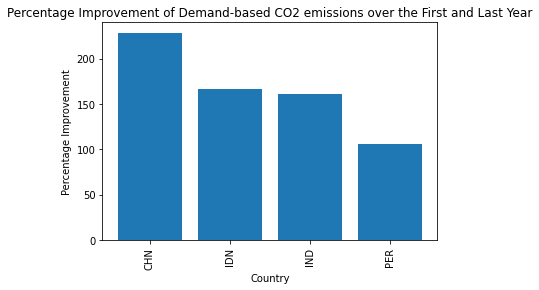

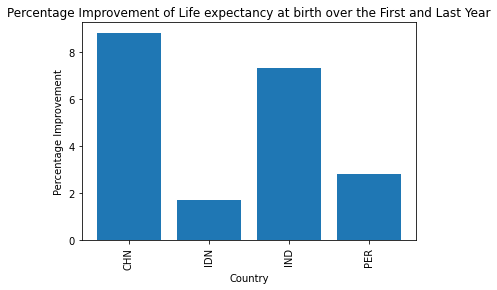

In [ ]:

attributes = ['Demand-based CO2 emissions', 'Life expectancy at birth']
for attribute in attributes: 
    iso3_codes = ['CHN', 'IND',  'IDN', 'PER']

    filtered_df = green[green['ISO3'].isin(iso3_codes)]

    improvement = (filtered_df.groupby('ISO3')[attribute].last().values - filtered_df.groupby('ISO3')[attribute].first().values) / filtered_df.groupby('ISO3')[attribute].first().values * 100

    plt.bar(filtered_df['ISO3'].unique(), improvement)
    plt.xlabel('Country')
    plt.ylabel('Percentage Improvement')
    plt.title(f'Percentage Improvement of {attribute} over the First and Last Year')
    plt.xticks(rotation=90)
    plt.show()


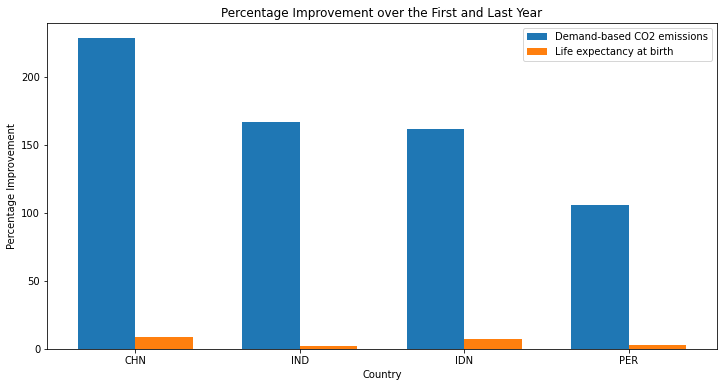

In [ ]:


attributes = ['Demand-based CO2 emissions', 'Life expectancy at birth']
iso3_codes = ['CHN', 'IND', 'IDN', 'PER']

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35

num_bars = len(iso3_codes)

indices = np.arange(num_bars)

for idx, attribute in enumerate(attributes):
    filtered_df = green[green['ISO3'].isin(iso3_codes)]
    improvement = (filtered_df.groupby('ISO3')[attribute].last().values - filtered_df.groupby('ISO3')[attribute].first().values) / filtered_df.groupby('ISO3')[attribute].first().values * 100
    
    bar_position = indices + idx * bar_width
    
    ax.bar(bar_position, improvement, bar_width, label=attribute)
    
ax.set_xlabel('Country')
ax.set_ylabel('Percentage Improvement')
ax.set_title('Percentage Improvement over the First and Last Year')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(iso3_codes)
ax.legend()

plt.show()


In [ ]:


df_filtered = water[water['Year'] >= water['Year'].max() - 19]

fig2 = px.choropleth(df_filtered, 
                    locations='Country', 
                    locationmode='country names', 
                    color='NATIONAL-Basic', 
                    hover_name='Country',
                    animation_frame='Year',
                    title='Improvement of NATIONAL-Basic over the last 20 years',
                    color_continuous_scale='inferno')
fig2.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play', method='animate', args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 0, 'easing': 'linear'}}]), dict(label='Pause', method='animate', args=[[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}])])])


fig2.show()


df_filtered = green[~green['Year'].isin([2021, 2022])]

fig = px.choropleth(df_filtered, 
                    locations='Country', 
                    locationmode='country names', 
                    color='Life expectancy at birth', 
                    hover_name='Country',
                    animation_frame='Year',
                    title='Life Expectancy at Birth over the Years',
                    color_continuous_scale='inferno')

fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play', method='animate', args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 0, 'easing': 'linear'}}]), dict(label='Pause', method='animate', args=[[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}])])])

fig.update_layout(geo=dict(showframe=False, 
                           showcoastlines=False,
                           projection_type='equirectangular'))

fig.show()




In [ ]:

merged_df = pd.merge(water, green[['ISO3', 'Year', 'Life expectancy at birth']], on=['ISO3', 'Year'])

merged_df = merged_df[['ISO3', 'Year', 'NATIONAL-Basic', 'Life expectancy at birth']]

print(merged_df)


     ISO3    Year  NATIONAL-Basic  Life expectancy at birth
0     AFG  2000.0       28.171415                     55.30
1     AFG  2001.0       28.199366                     55.80
2     AFG  2002.0       30.236385                     56.45
3     AFG  2003.0       32.273722                     57.34
4     AFG  2004.0       34.328559                     57.94
...   ...     ...             ...                       ...
4531  ZWE  2016.0       64.468964                     60.31
4532  ZWE  2017.0       63.996625                     60.71
4533  ZWE  2018.0       63.538773                     61.41
4534  ZWE  2019.0       63.094957                     61.29
4535  ZWE  2020.0       62.666458                     61.12

[4536 rows x 4 columns]


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    y=merged_df['Year'],
    z=merged_df['NATIONAL-Basic'],
    x=merged_df['Life expectancy at birth'],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
)])


fig.update_layout(
    scene=dict(
        xaxis_title='Year',
        yaxis_title='NATIONAL-Basic',
        zaxis_title='Life expectancy at birth'
    ),
    title='3D Scatter Plot'
)

# Display the plot
fig.show()


In [9]:
coll = columns_green
len = 0
for i in coll:
    for n in coll:
        if coll[i].corr(coll[n]) > .9 and coll[i].corr(coll[n]) < .98:
            print(coll[i].corr(coll[n]), '\n',  i,'\n', n,'\n','\n')
            len += 1
print(len)

0.9714120832544041 
 Conversion of seasonal to permanent water surface, % permanent water, since 1984 
 Terrestrial protected area, % land area 
 

0.9134058696683058 
 Demand-based CO2 emissions 
 Intact forest landscape, km2 
 

0.925607487186187 
 Demand-based CO2 emissions 
 Population 
 

0.9132591960036622 
 Demand-based CO2 intensity, energy-related CO2 per capita 
 Production-based CO2 intensity, energy-related CO2 per capita 
 

0.9535015477969554 
 Demand-based CO2 productivity, GDP per unit of energy-related CO2 emissions 
 Demand-based CO2 productivity, disposable income per unit of energy-related CO2 emissions 
 

0.9535015477969555 
 Demand-based CO2 productivity, disposable income per unit of energy-related CO2 emissions 
 Demand-based CO2 productivity, GDP per unit of energy-related CO2 emissions 
 

0.9751122667046449 
 Development of environment-related technologies, % all technologies 
 Relative advantage in environment-related technology 
 

0.907903607364208 
 Deve

/home/olivier/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/olivier/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


0.975633796708984 
 Forest resource stocks 
 Intact forest landscape, km2 
 

0.9014715852530872 
 Forest resource stocks 
 Total energy supply 
 

0.9304472054236895 
 Fossil fuel consumer support, % total tax revenue 
 Total fossil fuel support, % of total tax revenue 
 

0.9134058696683058 
 Intact forest landscape, km2 
 Demand-based CO2 emissions 
 

0.975633796708984 
 Intact forest landscape, km2 
 Forest resource stocks 
 

0.9221273533903184 
 Intact forest landscape, km2 
 Production-based CO2 emissions 
 

0.9014361644111526 
 Intact forest landscape, km2 
 Real GDP 
 

0.9298666281759025 
 Intact forest landscape, km2 
 Total energy supply 
 

0.9240827409141668 
 Labour tax revenue, % GDP 
 Labour tax revenue, % total tax revenue 
 

0.9240827409141668 
 Labour tax revenue, % total tax revenue 
 Labour tax revenue, % GDP 
 

0.978673709026928 
 Mean feed-in tariff for solar PV electricity generation 
 Mean feed-in tariff for wind electricity generation 
 

0.97867370902692

In [10]:
coll = columns_water
len = 0
for i in coll:
    for n in coll:
        if coll[i].corr(coll[n]) > .9 and coll[i].corr(coll[n]) < .98:
            print(coll[i].corr(coll[n]), '\n',  i,'\n', n,'\n','\n')
            len += 1
print(len)

0.9369587243337582 
 NATIONAL-Basic 
 NATIONAL-Proportion-Accessible on premises 
 

0.9514477132154028 
 NATIONAL-Limited 
 RURAL-Limited 
 

0.9553106569840468 
 NATIONAL-Unimproved 
 RURAL-Unimproved 
 

0.9304250490884481 
 NATIONAL-Surface water 
 RURAL-Surface water 
 

0.917204437811518 
 RURAL-Basic 
 RURAL-Proportion-Accessible on premises 
 

0.9514477132154027 
 RURAL-Limited 
 NATIONAL-Limited 
 

0.9553106569840469 
 RURAL-Unimproved 
 NATIONAL-Unimproved 
 

0.9304250490884481 
 RURAL-Surface water 
 NATIONAL-Surface water 
 

0.9454270984504393 
 NATIONAL-Proportion-Safely managed 
 NATIONAL-Proportion-Free from contamination 
 

0.950072535432282 
 NATIONAL-Proportion-Safely managed 
 RURAL-Proportion-Safely managed 
 

0.9554579508972224 
 NATIONAL-Proportion-Safely managed 
 URBAN-Proportion-Safely managed 
 

0.9369587243337582 
 NATIONAL-Proportion-Accessible on premises 
 NATIONAL-Basic 
 

0.9644393809189526 
 NATIONAL-Proportion-Accessible on premises 
 RURAL-Pro

In [12]:
coll = columns_green
len = 0
for i in coll:
    for n in coll:
        if coll[i].corr(coll[n]) <-.7:
            print(coll[i].corr(coll[n]), '\n',  i,'\n', n,'\n','\n')
            len += 1
print(len)

-0.8412234851393694 
 Biomass, % of DMC 
 Non-metallic minerals, % of DMC 
 

-0.7064547236610199 
 Energy related tax revenue, % total environmental tax revenue 
 Road transport-related tax revenue, % total environmental tax revenue 
 

-0.7914770625012603 
 Fossil fuel consumer support, % total fossil fuel support 
 Fossil fuel producer support, % total fossil fuel support 
 

-0.7914770625012603 
 Fossil fuel producer support, % total fossil fuel support 
 Fossil fuel consumer support, % total fossil fuel support 
 

-0.7558109508287852 
 Gas support, % total fossil fuel support 
 Petroleum support, % total fossil fuel support 
 

-0.7226192772727512 
 Labour tax revenue, % GDP 
 Population, ages 0-14, % total 
 

-0.882612002399943 
 Municipal waste disposed to landfills, % treated waste 
 Municipal waste incinerated, % treated waste 
 

-0.8249170042419096 
 Municipal waste disposed to landfills, % treated waste 
 Municipal waste recycled or composted, % treated waste  
 

-0.8826

In [19]:
coll = columns_water
len = 0
for i in columns_green:
    for n in columns_water:
        if columns_green[i].corr(columns_water[n]) > .6 and columns_green[i].corr(columns_water[n]) < .98:
            print(columns_green[i].corr(columns_water[n]), '\n',  i,'\n', n,'\n','\n')
            len += 1
print(len)

0.692394589835238 
 Population connected to sewerage with primary treatment, % total population 
 RURAL-Limited 
 

0.6197633636368958 
 Threatened mammal species, % total known species 
 NATIONAL-Proportion-Available when needed 
 

0.6260087479930139 
 Threatened mammal species, % total known species 
 URBAN-Proportion-Available when needed 
 

3


In [24]:
fig = px.scatter_3d(water, x='Year', z='NATIONAL-Proportion-Accessible on premises', y='Production-based CO2 emissions', color='ISO3')
fig.show()


In [31]:
merged_df = pd.merge(water,green, on='ISO3', how='inner')


In [35]:
unique_year_df = merged_df.drop_duplicates(subset=['Year_x', 'ISO3'], keep='first')



In [36]:
unique_year_df

,Unnamed: 0_x,Country_x,ISO3,Year_x,Population (thousands),% urban,NATIONAL-Basic,NATIONAL-Limited,NATIONAL-Unimproved,NATIONAL-Surface water,...,"Value added in industry, % of total value added","Value added in services, % of total value added","Water stress, total freshwater abstraction as % total available renewable resources","Water stress, total freshwater abstraction as % total internal renewable resources","Water, % total","Welfare costs of premature deaths from exposure to ambient ozone, GDP equivalent","Welfare costs of premature deaths from exposure to lead, GDP equivalent","Welfare costs of premature mortalities from exposure to ambient PM2.5, GDP equivalent","Welfare costs of premature mortalities from exposure to residential radon, GDP equivalent","Women, % total population"
0,0,Afghanistan,AFG,2000.0,20779.957031,22.077999,28.171415,3.660638,43.178306,24.989641,...,NaN,NaN,NaN,NaN,NaN,0.24,3.72,1.77,0.02,49.78
23,1,Afghanistan,AFG,2001.0,21606.992188,22.169001,28.199366,3.661542,43.167542,24.971550,...,NaN,NaN,NaN,NaN,NaN,0.24,3.72,1.77,0.02,49.78
46,2,Afghanistan,AFG,2002.0,22600.773438,22.261000,30.236385,3.949472,41.689620,24.124524,...,NaN,NaN,NaN,NaN,NaN,0.24,3.72,1.77,0.02,49.78
69,3,Afghanistan,AFG,2003.0,23680.871094,22.352999,32.273722,4.237154,40.210931,23.278193,...,NaN,NaN,NaN,NaN,NaN,0.24,3.72,1.77,0.02,49.78
92,4,Afghanistan,AFG,2004.0,24726.689453,22.499998,34.328559,4.524914,38.724280,22.422247,...,NaN,NaN,NaN,NaN,NaN,0.24,3.72,1.77,0.02,49.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103415,4909,Zimbabwe,ZWE,2016.0,14030.337891,32.295998,64.468964,12.815072,15.986929,6.729035,...,NaN,NaN,NaN,NaN,NaN,0.02,0.63,1.73,0.02,52.50
103438,4910,Zimbabwe,ZWE,2017.0,14236.598633,32.237000,63.996625,13.168596,16.069005,6.765775,...,NaN,NaN,NaN,NaN,NaN,0.02,0.63,1.73,0.02,52.50
103461,4911,Zimbabwe,ZWE,2018.0,14438.811523,32.209000,63.538773,13.516939,16.144769,6.799519,...,NaN,NaN,NaN,NaN,NaN,0.02,0.63,1.73,0.02,52.50
103484,4912,Zimbabwe,ZWE,2019.0,14645.472656,32.210003,63.094957,13.860095,16.214549,6.830398,...,NaN,NaN,NaN,NaN,NaN,0.02,0.63,1.73,0.02,52.50


In [37]:
fig = px.scatter_3d(unique_year_df, x='Year_x', z='NATIONAL-Basic', y='Production-based CO2 emissions', color='ISO3')
fig.show()
